In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

In [3]:
#pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Unins

In [2]:
# loading the dataset using pandas 
df= pd.read_excel("TrainDataset2023.xls")
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
df = df.rename(columns={"pCR (outcome)": "PCR"})

In [5]:
df.head()

,ID,PCR,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
# dropping the ID columns as this is doesn't contain any unique feature to contribut in model training
df = df.drop('ID', axis=1)

In [4]:
#replacing the 999 value to nan for easy removal
df.replace(999, np.nan, inplace= True)
null = df.isna().sum().sum()
print("Number of null values: ",null)

Number of null values:  17


In [5]:
# dropping the nan values
df= df.dropna()

In [6]:
# checking for duplicate values
duplicates = df.duplicated().sum()
print('number of duplicated rows: ',duplicates)

number of duplicated rows:  0


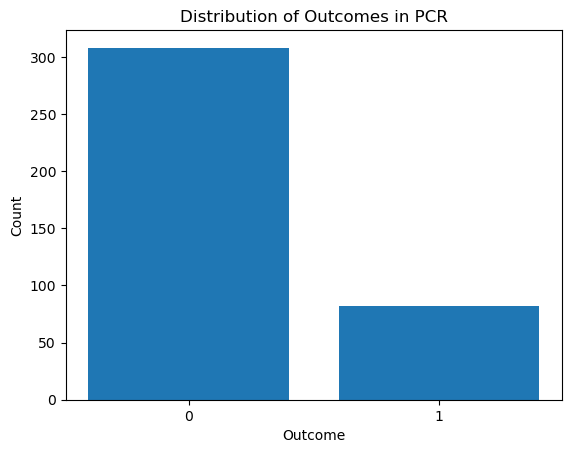

In [7]:
# plotting for zero and one value count in PCR column
outcomes = df['PCR'].value_counts()
outcome_labels =['0','1']
outcome_values = outcomes.values
plt.bar(outcome_labels, outcome_values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcomes in PCR')
plt.show()

In [8]:
# checking outliners if present in the dataset

def remove_outliers(df):
    threshold = 3
    z_scores = np.abs((df - df.mean()) / df.std())
    df = df[(z_scores < threshold).all(axis=1)]
    return df


In [9]:
# removing the outliners from dataset
df = remove_outliers(df)

In [10]:
df1 = df.copy()
# checking for correlated features of dataset
def correlation(data, threshold):
    col_corr = {}  # Dictionary to store correlated features
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute coefficient value
                colname = corr_matrix.columns[i]
                if colname not in col_corr:
                    col_corr[colname] = set()
                col_corr[colname].add(corr_matrix.columns[j])

    return col_corr

corr_features = correlation(df1, 0.8)
print('correlated features: ', len(corr_features))

correlated features:  87


In [11]:
# removing the correlated features
df_corr= df1.drop(labels=corr_features, axis=1)
df_corr.shape

(304, 32)

In [482]:
# saving the feature in text file for future use in model training and prediction
#not_correlated_features = set(df1.columns) - set(corr_features.keys())
#with open('not_correlated_features.txt', 'w') as f:
 #   for feature in not_correlated_features:
#        f.write(feature + '\n')


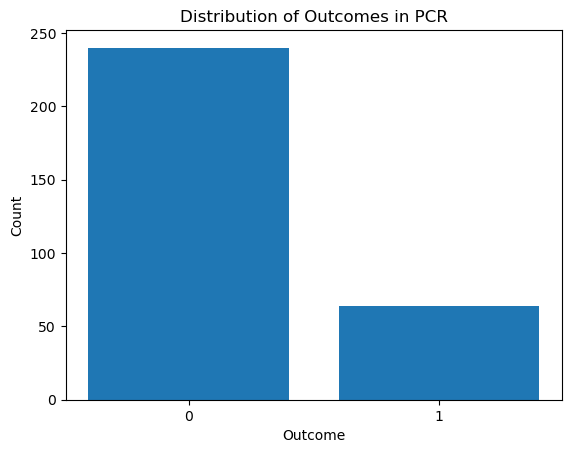

In [12]:
# checking the count of target values after data processing and feature selection
outcomes = df_corr['PCR'].value_counts()
outcome_labels =['0','1']
outcome_values = outcomes.values
plt.bar(outcome_labels, outcome_values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcomes in PCR')
plt.show()

In [101]:
# dataset using correlated feature selection
X_corr = df_corr.drop(["PCR","RelapseFreeSurvival (outcome)"],axis=1)
y_corr = df_corr["PCR"]

In [485]:
X_corr.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,HistologyType,LNStatus,TumourStage,original_shape_Elongation,...,original_gldm_DependenceEntropy,original_gldm_SmallDependenceEmphasis,original_glrlm_RunLengthNonUniformity,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_LargeAreaEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_ngtdm_Coarseness
2,31.0,0,0.0,0.0,1.0,2.0,1.0,0.0,2,0.645083,...,2.863091,0.007181,114.255050,0.503046,72.027027,0.973338,1561963.432,0.275749,0.534549,0.007584
3,35.0,0,0.0,0.0,1.0,3.0,1.0,1.0,3,0.770842,...,2.756432,0.004902,212.625994,0.399896,99.019802,0.980394,7007670.723,0.253014,0.506185,0.005424
4,61.0,1,0.0,0.0,0.0,2.0,1.0,0.0,2,0.861035,...,2.676170,0.007222,101.119011,0.473278,56.034483,0.966112,1288913.690,0.216409,0.462282,0.006585
5,49.0,0,0.0,0.0,1.0,3.0,1.0,1.0,3,0.948285,...,2.930247,0.008891,236.880022,0.501885,98.020000,0.980200,1815164.550,0.272800,0.532369,0.002652
7,41.0,0,0.0,0.0,1.0,3.0,1.0,1.0,2,0.951395,...,3.358576,0.010091,226.647909,0.558101,86.022727,0.977531,1045481.284,0.218492,0.476326,0.002821


In [486]:
# saving the feature in text file for future use in model training and prediction
with open('30cor.txt', 'w') as f:
    for feature in X_corr.columns:
        f.write(feature + '\n')


In [14]:
# Split the correlated feature into training and testing sets ( correlated features)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_corr, y_corr, test_size=0.2,shuffle=True,random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_sc1 = scaler.fit_transform(X_train1)
X_test_sc1 = scaler.fit_transform(X_test1)


In [266]:
X_train1.shape, 

((243, 30),)

In [ ]:
# dataset using correlated feature selection for forward feature selection
X_for = df_corr.drop(["PCR","RelapseFreeSurvival (outcome)"],axis=1)
y_for = df_corr["PCR"]

In [496]:
#  forward feature selection method
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Creating a SequentialFeatureSelector object with RandomForestClassifier as the estimator
selector = SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select='auto')

# Fitting the selector to the data
selector.fit(X_for, y_for)

# Getting the selected features
selected_features1 = X_for.columns[selector.get_support()]

In [508]:
# Create a copy of the dataset with the selected features
X_selected_for1 = df_corr[selected_features1]
X_selected_for1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 2 to 399
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ER                                               304 non-null    int64  
 1   PgR                                              304 non-null    float64
 2   TrippleNegative                                  304 non-null    float64
 3   ChemoGrade                                       304 non-null    float64
 4   HistologyType                                    304 non-null    float64
 5   LNStatus                                         304 non-null    float64
 6   TumourStage                                      304 non-null    int64  
 7   original_shape_Elongation                        304 non-null    float64
 8   original_firstorder_10Percentile                 304 non-null    float64
 9   original_firstorder_90Percentile

In [501]:
# Saving the selected features to a text file
with open('selected_features_forwardpcr.txt', 'w') as f:
    for feature in selected_features:
        f.write(feature + '\n')

In [16]:
# loading the text file
with open('selected_features_forwardpcr.txt', 'r') as f:
    selected_features = []
    for line in f:
        selected_features.append(line.strip())

In [17]:
# X and y for forward feature selection
df3 = df.copy()
X2 = df3[selected_features]
y2 = df3["PCR"]

In [18]:
X2.shape

(304, 15)

In [19]:
# Splitting the data into training and testing sets ( forward feature selection)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,shuffle=True,random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_sc2 = scaler.fit_transform(X_train2)
X_test_sc2 = scaler.fit_transform(X_test2)


In [30]:
# Defining hyperparameter gridsearch for LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'random_state': [42],
    'max_iter': [10000]
}

# Instantiating LogisticRegression classifier 
model1 = LogisticRegression()

# Create GridSearchCV objects for correlation and forward selection datasets
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=10)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=10)

# Fitting the GridSearchCV objects
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV 
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

print("correlation:", best_params1)
print("forward:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for 2 datasets
best_model1 = LogisticRegression(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = LogisticRegression(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy 
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV 
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test1, y_pred1))


C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

correlation: {'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
forward: {'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
correlation balanced accuracy: 0.5841836734693877
forward balanced accuracy: 0.46938775510204084
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        49
         1.0       0.43      0.25      0.32        12

    accuracy                           0.79        61
   macro avg       0.63      0.58      0.59        61
weighted avg       0.75      0.79      0.76        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        49
         1.0       0.43      0.25      0.32        12

    accuracy                           0.79        61
   macro avg       0.63      0.58      0.59        61
weighted avg       0.75      0.79     

C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

In [33]:
# Defining hyperparameter grid for SVC
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01,0.1, 1, 10, 100,150],
    'gamma': [0.001,0.01, 0.1, 1],
    'random_state': [42]
}

# Instantiating SVC classifier 
model1 = SVC()

# Creating the GridSearchCV objects for dataset 1 and 2 (correlation and forward selection datasets)
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printting the best parameters for each dataset
print("Dataset1:", best_params1)
print("Dataset2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = SVC(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = SVC(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test1, y_pred1))


Dataset1: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 42}
Dataset2: {'C': 150, 'gamma': 0.01, 'kernel': 'poly', 'random_state': 42}
correlation balanced accuracy: 0.6267006802721089
forward balanced accuracy: 0.5
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85        49
         1.0       0.38      0.42      0.40        12

    accuracy                           0.75        61
   macro avg       0.62      0.63      0.62        61
weighted avg       0.76      0.75      0.76        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85        49
         1.0       0.38      0.42      0.40        12

    accuracy                           0.75        61
   macro avg       0.62      0.63      0.62        61
weighted avg       0.76      0.75      0.76        61



In [34]:
from sklearn.tree import DecisionTreeClassifier

# Defining hyperparameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Instantiating DecisionTreeClassifier 
model1 = DecisionTreeClassifier()

# Creating GridSearchCV objects for dataset 1 and 2
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printting the best parameters for each dataset
print("Dataset1:", best_params1)
print("Dataset2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = DecisionTreeClassifier(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = DecisionTreeClassifier(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred1))


Dataset1: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Dataset2: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42}
correlation balanced accuracy: 0.5238095238095238
forward balanced accuracy: 0.5331632653061225
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.71      0.76        49
         1.0       0.22      0.33      0.27        12

    accuracy                           0.64        61
   macro avg       0.52      0.52      0.51        61
weighted avg       0.70      0.64      0.66        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.71      0.76        49
         1.0       0.22      0.33      0.27        12

    accuracy                           0.64        61
   macro avg       0.52      0.52      0.51        61
weig

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Defining hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Instantiate RandomForestClassifier 
model1 = RandomForestClassifier()

# Creating GridSearchCV objects for dataset1 and 2
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printting the best parameters for each dataset
print("Dataset1:", best_params1)
print("Dataset2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = RandomForestClassifier(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = RandomForestClassifier(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred1))


Dataset1: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 42}
Dataset2: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
correlation balanced accuracy: 0.5943877551020409
forward balanced accuracy: 0.5416666666666666
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.88        49
         1.0       0.50      0.25      0.33        12

    accuracy                           0.80        61
   macro avg       0.67      0.59      0.61        61
weighted avg       0.77      0.80      0.78        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.88        49
         1.0       0.50      0.25      0.33        12

    accuracy                           0.80        61
   macro avg       0.67      0.59      0.61        61
weig

In [53]:
from sklearn.neural_network import MLPClassifier

# Defining hyperparameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
    'activation': ['identity', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [42]
}

# Instantiating MLPClassifier 
model1 = MLPClassifier(max_iter= 1000)

# Creating GridSearchCV objects for dataset 1 and 2
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train1, y_train1)
grid_search2.fit(X_train2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Print the best parameters for each dataset
print("Dataset1:", best_params1)
print("Dataset2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = MLPClassifier(**best_params1)
best_model1.fit(X_train1, y_train1)
y_pred1 = best_model1.predict(X_test1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = MLPClassifier(**best_params2)
best_model2.fit(X_train2, y_train2)
y_pred2 = best_model2.predict(X_test2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred1))


C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or sca

Dataset1: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'random_state': 42, 'solver': 'lbfgs'}
Dataset2: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'random_state': 42, 'solver': 'lbfgs'}
correlation balanced accuracy: 0.5
forward balanced accuracy: 0.45606060606060606
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.10      1.00      0.18         6

    accuracy                           0.10        61
   macro avg       0.05      0.50      0.09        61
weighted avg       0.01      0.10      0.02        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.10      1.00      0.18         6

    accuracy                           0.10        61
   macro

C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining hyperparameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Instantiating GradientBoostingClassifier 
model1 = GradientBoostingClassifier()

# Creating GridSearchCV objects for dataset 1 and 2
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train1, y_train1)
grid_search2.fit(X_train2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printting the best parameters for each dataset
print("correlation:", best_params1)
print("Forward:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = GradientBoostingClassifier(**best_params1)
best_model1.fit(X_train1, y_train1)
y_pred1 = best_model1.predict(X_test1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = GradientBoostingClassifier(**best_params2)
best_model2.fit(X_train2, y_train2)
y_pred2 = best_model2.predict(X_test2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred1))


Dataset1: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Dataset2: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'random_state': 42}
correlation balanced accuracy: 0.45918367346938777
forward balanced accuracy: 0.5110544217687075
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        49
         1.0       0.00      0.00      0.00        12

    accuracy                           0.74        61
   macro avg       0.39      0.46      0.42        61
weighted avg       0.63      0.74      0.68        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        49
         1.0       0.00      0.00      0.00        12

    accuracy                           0.74        61
   macro avg  

In [264]:
from sklearn.neural_network import MLPClassifier


# Defining hyperparameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [[32, 16, 8], [64, 32, 16], [128, 64, 32]],
    'activation': ['relu', 'sigmoid'],
    'solver': ['sgd', 'adam']
}

# Instantiate MLPClassifier 
model1 = MLPClassifier(max_iter=1000)

# Creating GridSearchCV objects for correlation and Forward feature 
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects 
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters 
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printting the best parameters for each dataset
print("correlation:", best_params1)
print("Forward:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = MLPClassifier(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = MLPClassifier(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred1))


C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic 

correlation: {'activation': 'relu', 'hidden_layer_sizes': [32, 16, 8], 'solver': 'adam'}
Forward: {'activation': 'relu', 'hidden_layer_sizes': [32, 16, 8], 'solver': 'sgd'}


C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


correlation balanced accuracy: 0.47424242424242424
forward balanced accuracy: 0.5
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.78      0.83        55
         1.0       0.08      0.17      0.11         6

    accuracy                           0.72        61
   macro avg       0.49      0.47      0.47        61
weighted avg       0.82      0.72      0.76        61

forward classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.78      0.83        55
         1.0       0.08      0.17      0.11         6

    accuracy                           0.72        61
   macro avg       0.49      0.47      0.47        61
weighted avg       0.82      0.72      0.76        61



C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
# training the random forest model for correlated features dataset



X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.3,shuffle= True, random_state=64)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Creating and train Random Forest classifier with specific parameters got from gridsearch
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=15, n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_norm, y_train)

# Predicting class labels for testing data
y_pred = rf_classifier.predict(X_test_norm)

# Calculating classification report and balanced accuracy score
classification_report = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print('Classification Report:')
print(classification_report)

print('\nBalanced Accuracy Score:')
print(balanced_accuracy)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        79
         1.0       0.60      0.23      0.33        13

    accuracy                           0.87        92
   macro avg       0.74      0.60      0.63        92
weighted avg       0.84      0.87      0.84        92


Balanced Accuracy Score:
0.6027263875365141


In [265]:
from imblearn.over_sampling import SMOTE


# resampling the data using SMOTE for better performance 
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_corr, y_corr)

# Splitting data into training and testing sets again after data resampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=64)

# Scaling data with StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_norm, y_train)

y_pred = rf_classifier.predict(X_test_norm)

classification_report = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print('Classification Report:')
print(classification_report)

print('\nBalanced Accuracy Score:')
print(balanced_accuracy)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75        75
         1.0       0.72      0.75      0.74        69

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.74      0.74      0.74       144


Balanced Accuracy Score:
0.7434782608695651


In [248]:
from imblearn.over_sampling import RandomOverSampler


# using Random sampler
rs = RandomOverSampler(random_state=24)
X_resampled, y_resampled = rs.fit_resample(X_corr, y_corr)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,shuffle= True, random_state=60)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


rf_classifier = RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_norm, y_train)

y_pred = rf_classifier.predict(X_test_norm)

classification_report = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print('Classification Report:')
print(classification_report)

print('\nBalanced Accuracy Score:')
print(balanced_accuracy)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        47
         1.0       0.84      0.84      0.84        49

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.83      0.83      0.83        96


Balanced Accuracy Score:
0.8332609639600521


In [249]:
#saving the random forest trained model
#pickle.dump(rf_classifier, open('rf_model1.pkl', 'wb'))

In [250]:
# Applying the thresholding function to the ypred array
threshold = 0.5
ypred_thresholded = (y_pred >= threshold).astype(int)
print(ypred_thresholded)

[0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0]


In [251]:
from sklearn.metrics import confusion_matrix

# Creating confusion matrix for actual and predicted values
confusion_matrix = confusion_matrix(y_test, ypred_thresholded)
print(confusion_matrix)

[[39  8]
 [ 8 41]]


In [261]:
import pickle
# Loading the random forest model from the file
loaded_model = pickle.load(open('rf_model1.pkl', 'rb'))

In [263]:
# Perform 10-fold cross-validation on the dataset using the Random forest
k = KFold(n_splits=10)
scores = cross_val_score(rf_classifier, X_train, y_corr, cv=k)
# Printing the accuracy of each fold
print("Accuracy for each fold:")
for i in range(len(scores)):
    print("Fold " + str(i) + ": " + str(scores[i]))

# Printing the average accuracy
average_accuracy = sum(scores) / len(scores)
print("Average accuracy: " + str(average_accuracy))


Accuracy for each fold:
Fold 0: 0.8064516129032258
Fold 1: 0.9032258064516129
Fold 2: 0.8064516129032258
Fold 3: 0.7741935483870968
Fold 4: 0.7
Fold 5: 0.8
Fold 6: 0.8333333333333334
Fold 7: 0.6666666666666666
Fold 8: 0.7
Fold 9: 0.8666666666666667
Average accuracy: 0.7856989247311829


In [255]:
df4 = pd.read_excel("C:/Users/psxtm7/Downloads/TestDatasetExample1.xls")

In [256]:
# Load the columns from the text file
with open("30cor.txt") as f:
    selected_features = f.readlines()
    selected_features = [feature.strip() for feature in selected_features]

In [257]:
df5 = df4[selected_features]

In [258]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              19 non-null     float64
 1   ER                                               19 non-null     int64  
 2   PgR                                              19 non-null     int64  
 3   HER2                                             19 non-null     int64  
 4   TrippleNegative                                  19 non-null     int64  
 5   ChemoGrade                                       19 non-null     int64  
 6   HistologyType                                    19 non-null     int64  
 7   LNStatus                                         19 non-null     int64  
 8   TumourStage                                      19 non-null     int64  
 9   original_shape_Elongation         

In [259]:
X_test1 = scaler.fit_transform(df5)

In [260]:
# predicting the test set
ypred = loaded_model.predict(X_test1)
# Defining the threshold value
threshold = 0.5

# Applying the thresholding function to the ypred array
ypred_thresholded = (ypred >= threshold).astype(int)

print(ypred_thresholded)

[0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0]
